<a href="https://colab.research.google.com/github/LennartReddm/EvoAnalysisADGame/blob/main/Evolutionary_Analysis_of_the_Two_Strategy_AD_Game.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Used libraries
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
from sympy import *
import random

### The game to solve - AD-Contest with two strategies

We will try to solve the following Attacker-Defender Contest with two strategies (as can be found in De Dreu & Gross, 2019, see below) using both classical and evolutionary game theory:

&nbsp;

|    AD-Contest with two strategies |     |     |     |     |
|-----------|-----------|-----------|-----------|-----------|
|           |           |           |  Defender |           |
|           |           |           |    q1     |     q2    |
|           |           |Strategy   |     C     |     D     |
| Attacker  |    p1     |        C  |   1 \ 2   |   1 \ 1   |
|           |    p2     |        D  |   2 \ 0   |   0 \ 1   |

&nbsp;

Reference:

De Dreu, C., & Gross, J. (2019). Revisiting the form and function of conflict: Neurobiological, psychological, and cultural mechanisms for attack and defense within and between groups. Behavioral and Brain Sciences, 42, E116. doi:10.1017/S0140525X18002170

### Nash Equilibrium



We easily see that there is no pure Nash equilibrium.

To calculate the mixed strategy equilibrium, we consider that attackers are indifferent between C and D when:

$E_{A}(C) = 1 * q1 + 1 * q2 = 1 * 0.5 + 1 * 0.5 = 1 $

$E_{A}(D) = 2 * q1 + 0 * q2 = 2 * 0.5 + 0 * 0.5 = 1 $

That is when defenders play a mix of (q1, q2) = (0.5, 0.5).

Defenders are indifferent between C and D when:

$E_{D}(C) = 2 * p1 + 0 * p2 = 2 * 0.5 + 0 * 0.5 = 1 $

$E_{D}(D) = 1 * p1 + 1 * p2 = 1 * 0.5 + 1 * 0.5 = 1 $

That is, when attackers play a mix of (p1, p2) = (0.5, 0.5).

The mixed strategy quilibrium is therefore: 

$S_{mix} = ((p1, p2), (q1, q2)) = ((0.5, 0.5), (0.5, 0.5))$

### Evolutionary Game Theory

#### Building the replicator systems

Let the average population state of the Attacker population be:

$ \sigma_{A} = p1 * C_{A} + p2 * D_{A} $ 

&nbsp;

And the average population state of the Defender population is:

$ \tau_{D} = q1 * C_{D} + q2 * D_{D} $ 

&nbsp;

Attackers randomly meet Defenders and play the game. 


---

&nbsp;

We note down the average population pay-off for the attacker and defender population.


The expected average pay-off of the attacker population is:

$ E_{A}(\sigma_{A},\tau_{D}) = p1 * (1∗q1+1∗q2) + p2 * (2 * q1 + 0 * q2) = q1*p1 + q2*p1 + 2*q1*p2   $

&nbsp;

The expected average pay-off of the defender population is:

$ E_{D}(\sigma_{A},\tau_{D}) = q1 * (2 * p1 + 0 * p2) + q2 * (1 * p1 + 1 * p2) = 2 * q1 * p1 + q2 * p1 + q2 * p2 $

&nbsp;

---

&nbsp;

We note down the expected pay-off for attacker for playing D against the population mix of the defender:

 $ E_{A}(D_{A},\tau_{D}) = 2 * q1 + 0 * q2 $


&nbsp;

We note down the expected pay-off for defender for playing D against the  population mix of the attacker:

$ E_{D}(\sigma_{A},D_{D}) = 1 * p1 + 1 * p2 $ 


&nbsp;

---

&nbsp;

Therefore, the replicator systems are:

$ \dot{p2}  = ( E_{A}(D_{A},\tau_{D}) - E_{A}(\sigma_{A},\tau_{D}) ) * p2 
           = ( (2 * q1 + 0 * q2) - (q1 * p1 + q2 * p1 + 2 * q1 * p2)) * p2 $ 

&nbsp;

$ \dot{q2} = ( E_{D}(\sigma_{A},D_{D}) - E_{D}(\sigma_{A},\tau_{D}) ) * q2 
           = ( (1 * p1 + 1 * p2) - (2 * q1 * p1 + q2 * p1 + q2 * p2)) * q2 $ 

&nbsp;

Where $ \dot{p1} $ and $ \dot{q1} $ are the growth rates of the share of the attacker and defender population playing D, respectively.


In [ ]:
# We build the replicator systems programatically

# Set symbols
p1, p2, q1, q2 = symbols('p1, p2, q1, q2')

# payoffs for Attacker
CC_A = 1; CD_A = 1; DC_A = 2; DD_A = 0
# payoffs for Defender
CC_D = 2; CD_D = 1; DC_D = 0; DD_D = 1

p1 = 1 - p2
q1 = 1 - q2

# Replicator systems
p2_dot = ((q1 * DC_A + q2 * DD_A) - (p1 * (q1 * CC_A + q2 * CD_A) + p2 * (q1 * DC_A + q2 * DD_A))) * p2
q2_dot = ((p1 * CD_D + p2 * DD_D) - (q1 * (p1 * CC_D + p2 * DC_D) + q2 * (p1 * CD_D + p2 * DD_D))) * q2

print(p2_dot) 
print(q2_dot)

p2*(-p2*(2 - 2*q2) + p2 - 2*q2 + 1)
q2*(-q2 - (1 - q2)*(2 - 2*p2) + 1)


#### Replicator systems - Simplifying the equation

We start with the replicator system for the attacker population:

$ \dot{p2}  = ( E_{A}(D_{A},\tau_{D}) - E_{A}(\sigma_{A},\tau_{D}) ) * p2 
           = ( (2 * q1 + 0 * q2) - (q1 * p1 + q2 * p1 + 2 * q1 * p2)) * p2 $ 

&nbsp;

We substitute p1 = p2 - 1 and q1 = q2 - 1 and simplify the expression:

$ \dot{p2} = p2 * (p2 - 1) * (2q2 - 1) $ 



&nbsp;

Now the replicator system for the defender population:

$ \dot{q2} = ( E_{D}(\sigma_{A},C_{D}) - E_{A}(\sigma_{A},\tau_{D}) ) * q2 
           = ( (2 * p1 + 0 * p2) - (2 * q1 * p1 + q2 * p1 + q2 * p2)) * q2 $ 

&nbsp;

We substitute q1 = q2 - 1 and p1 = p2 - 1 and simplify the expression:

$ \dot{q2} = -q2 * (2p2 - 1) * (q2 - 1) $ 

In [ ]:
# We use Sympy to check the simplification of the expressions
simplify(p2_dot)  

p2*(2*p2*q2 - p2 - 2*q2 + 1)

In [ ]:
# Factorize
factor(p2_dot) 

p2*(p2 - 1)*(2*q2 - 1)

In [ ]:
# We use Sympy to check the simplification of the expressions 
simplify(q2_dot)

q2*(-2*p2*q2 + 2*p2 + q2 - 1)

In [ ]:
# Factorize
factor(q2_dot)

-q2*(2*p2 - 1)*(q2 - 1)

#### Finding the stable states of the system

We therefore have the interdependent growth rates for the attacker and defender population described by the following system of equations:

$ \dot{p2} = p2 * (p2 - 1) * (2q2 - 1) $ 

$ \dot{q2} = -q2 * (2p2 - 1) * (q2 - 1) $ 


To find the equilibria of the replicator system, we solve simultaneously the pair of equations $ \dot{p2} = 0 $ and $ \dot{q2} = 0 $. We find that the equilibria are (p2, q2) = (0, 0), (0, 1), (1/2, 1/2), (1, 0) and (1, 1). Note that these equilibria are stable states but are not necessarily evolutionary stable (i.e., they are not asymptotically stable). That is, if the attacker or defender population start on or converge to any of these population states, there will be no further evolutionary drift - however, these states are vulnerable of being invaded by mutants.

In [ ]:
# Check using sympy
p1, p2, q1, q2 = symbols('p1, p2, q1, q2')

p2_dot = (p2 - 1) * (2 * q2 - 1) * p2
q2_dot = (q2 - 1) * (2 * p2 - 1) * -q2

# use sympy's way of setting equations to zero
AEqual = Eq(p2_dot, 0)
BEqual = Eq(q2_dot, 0)
# compute fixed points
equilibria = solve([AEqual, BEqual], [p2, q2])
print(equilibria)

[(0, 0), (0, 1), (1/2, 1/2), (1, 0), (1, 1)]


#### Finding the nullclines

Now, we find the nullclines, that is line(s) on which there is no change in the share of the attacker population playing D ($ \dot{p2} = 0 $), and line(s) in which there is no change in the share of the defender population playing D ($ \dot{q2} = 0 $). 


We have an growth rate $ \dot{p2} = 0 $ when p2 = 0, p2 = 1, or q2 = 1/2, and a growth rate of $ \dot{q2} = 0 $ when q2 = 0, q2 = 1 and p2 = 1/2.

The nullclines divide the phase potrait into open regions on which  p1˙  and  q1˙  do not change signs. In other words, the nullclines help us to divide the function space of the replicator system such that we can determine the direction of the evolutionary drift of the system in these areas. We can find the direction of  p2  and  q2  by checking one point in that region. Note that the intesection points of the nullclines are the stable states found by solving the system at p_dot = q_dot = 0.

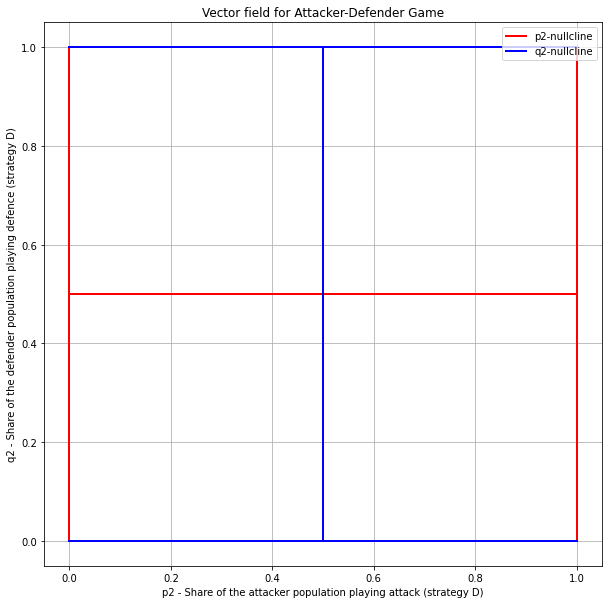

In [ ]:
# We plot a vector field including the nullclines

fig = plt.figure(figsize=(10,10))  
ax1 = fig.add_subplot(1,1, 1)
ax1.set_xlabel("p2 - Share of the attacker population playing attack (strategy D)")
ax1.set_ylabel("q2 - Share of the defender population playing defence (strategy D)")  
ax1.set_title("Vector field for Attacker-Defender Game")

# plot nullclines for p2
ax1.plot([0,1],[.5,.5], 'r-', lw=2, label='p2-nullcline')
ax1.plot([0,0],[0,1], 'r-', lw=2)
ax1.plot([1,1],[0,1], 'r-', lw=2)

# plot nullclines for q2
ax1.plot([.5,.5], [0,1], 'b-', lw=2, label='q2-nullcline')
ax1.plot([0,1], [0,0], 'b-', lw=2)
ax1.plot([0,1], [1,1], 'b-', lw=2)

ax1.legend(loc='upper right')
ax1.grid()

#### Finding and plotting direction vectors

To get an idea on the directions of evolutionary drift of the attacker and defender population in our system, we check solutions for each line segment between stable states as well as for the regions created by the nullclines.

In [ ]:

# Line segments and regions between the stable states:
# (0, 0), (0, 1), (1/2, 1/2), (1, 0), (1, 1)

# Line segments
# (0, 0), (0, 1/2) -> (0, .25)
# (0, 1/2), (0, 1) -> (0, .75)
# (0, 0), (1/2, 0) -> (.25, 0)
# (1/2, 0), (1, 0) -> (.75, 0)

# (1, 1), (1, 1/2) -> (1, .75)
# (1, 1/2), (1, 0) -> (1, .25)
# (1, 1), (1/2, 1) -> (.75, 1)
# (1/2, 1), (0, 1) -> (.25, 1)

# (1, 1/2)(1/2, 1/2) -> (.75, 1/2)
# (1/2, 1/2)(0, 1/2) -> (.25, 1/2)

# (1/2, 1)(1/2, 1/2) -> (1/2, .75)
# (1/2, 1/2)(1/2, 0) -> (1/2, .25)

# Regions
# (.25, .25)
# (.75, .75)
# (.25, .75)
# (.75, .25)

# Thus, these are the points to check:
pointsToCheck = [(0, .25),(0, .75), (.25, 0), (.75, 0), 
                 (1, .75), (1, .25), (.75, 1), (.25, 1), 
                 (.75, 1/2), (.25, 1/2), (1/2, .75), (1/2, .25), 
                 (.25, .25), (.75, .75), (.25, .75), (.75, .25)]

# We calculate solutions for each point:
solutionsByPointString = []
solutionsByPoint = []
for i in pointsToCheck:

  # p1_dot = (1 - p1) * (-1 + 2*q1) * p1  
  # q1_dot = (1 - q1) * (1 - 2*p1) * q1 

  # p2_dot = (p2 - 1) * (2 * q2 - 1) * p2
  # q2_dot = (q2 - 1) * (2 * p2 - 1) * -q2

  p2_dot = (i[0] - 1) * (2 * i[1] - 1) * i[0]
  q2_dot = (i[1] - 1) * (2 * i[0] - 1) * -i[1]

  solution = (i, (p2_dot, q2_dot))
  solutionString = "For point (p1, q1) = {} the growth rate (p1_dot, q1_dot) is {}".format(i, (p2_dot, q2_dot))
  solutionsByPoint.append(solution)
  solutionsByPointString.append(solutionString)

solutionsByPointString

['For point (p1, q1) = (0, 0.25) the growth rate (p1_dot, q1_dot) is (0.0, -0.1875)',
 'For point (p1, q1) = (0, 0.75) the growth rate (p1_dot, q1_dot) is (-0.0, -0.1875)',
 'For point (p1, q1) = (0.25, 0) the growth rate (p1_dot, q1_dot) is (0.1875, 0.0)',
 'For point (p1, q1) = (0.75, 0) the growth rate (p1_dot, q1_dot) is (0.1875, -0.0)',
 'For point (p1, q1) = (1, 0.75) the growth rate (p1_dot, q1_dot) is (0.0, 0.1875)',
 'For point (p1, q1) = (1, 0.25) the growth rate (p1_dot, q1_dot) is (-0.0, 0.1875)',
 'For point (p1, q1) = (0.75, 1) the growth rate (p1_dot, q1_dot) is (-0.1875, -0.0)',
 'For point (p1, q1) = (0.25, 1) the growth rate (p1_dot, q1_dot) is (-0.1875, 0.0)',
 'For point (p1, q1) = (0.75, 0.5) the growth rate (p1_dot, q1_dot) is (-0.0, 0.125)',
 'For point (p1, q1) = (0.25, 0.5) the growth rate (p1_dot, q1_dot) is (-0.0, -0.125)',
 'For point (p1, q1) = (0.5, 0.75) the growth rate (p1_dot, q1_dot) is (-0.125, 0.0)',
 'For point (p1, q1) = (0.5, 0.25) the growth rate

Based on the solutions, we plot direction vectors onto the vector field:

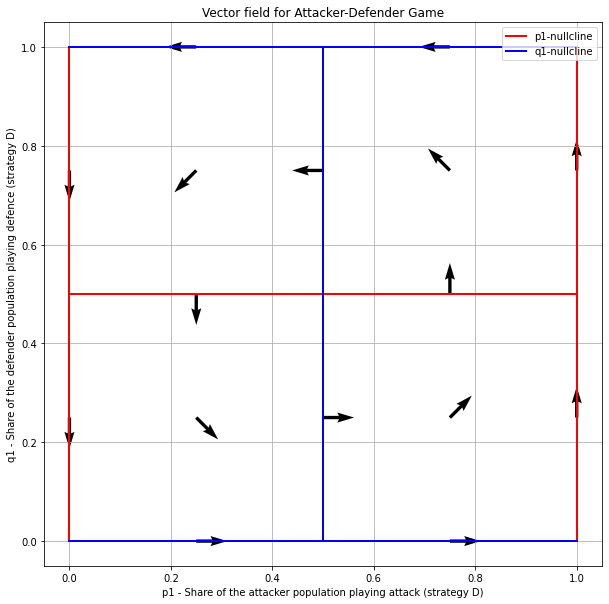

In [ ]:
fig = plt.figure(figsize=(10,10))  
ax1 = fig.add_subplot(1,1, 1)
ax1.set_xlabel("p1 - Share of the attacker population playing attack (strategy D)")
ax1.set_ylabel("q1 - Share of the defender population playing defence (strategy D)")  
ax1.set_title("Vector field for Attacker-Defender Game")

# plot nullclines for p1
ax1.plot([0,1],[.5,.5], 'r-', lw=2, label='p1-nullcline')
ax1.plot([0,0],[0,1], 'r-', lw=2)
ax1.plot([1,1],[0,1], 'r-', lw=2)

# plot nullclines for p2
ax1.plot([.5,.5], [0,1], 'b-', lw=2, label='q1-nullcline')
ax1.plot([0,1], [0,0], 'b-', lw=2)
ax1.plot([0,1], [1,1], 'b-', lw=2)

# plot vectors
for i in solutionsByPoint:
  ax1.quiver(i[0][0], i[0][1], i[1][0], i[1][1], width = 0.006)

ax1.legend(loc='upper right')
ax1.grid()

The vectors on the vector field seem to indicate a decrease in the share of defenders playing defence (Defender strategy D) as long as the share of the attacker population playing attack (Attacker strategy D) is below 0.5. On the other hand, if the share of attackers playing attack increases over 0.5, the defender population playing D increases again.

Likewise, the share of attackers playing attack seems to increase as the share of the defender population playing defence drops below 0.5 but decreases when the share of the defender population playing defence exceeds 0.5.

Intuitively this makes sense: Attack is a evolutionary viable strategy if the majority of the defender population is peaceful (Defender strategy C, i.e., defenders do not invests in defence), leading to a growth in the population of aggressive attackers. But attack becomes to costly if the majority of the defender population is made up of active defenders. Defenders, on the other hand, adapt to an aggressive attacker population by more frequently playing (costly) defence. However, as attackers become more peaceful again, defence stops paying off, leading to a decrease in defenders playing defence.

#### Finding the eigenvalues

While the vector analysis above seems to indicate a circular pattern of dependently rising and declining attacker and defender populations, we can't be completely sure about the nature of our equilibria. While the equlibria are stable at the exact points, small exogenous perpetuation (e.g., a random mutation) might lead to deviation from the stable state. Is any of our equilibria evolutionary stable? Or (as the vector plot indicates) are they unstable "saddles" leading to a circular pattern?

To check this, we need to find the eigenvalues of our system of equations. Since we have a non-linear system of differential equations, however, we cannot calculate the eigenvalues directly. Instead we linearize the system by calculating the Jacobinian Matrix of the system. We then evaluate the Jacobinian at each equilibria point, giving us the linear system at that point. Based on that, we calculate the eigenvalues to determine the behavior at the equilibrium.

In [ ]:
# We write the replictor system in sympy
p2, q2 = symbols('p2, q2', negative=False)

p2_dot = (p2 - 1) * (2 * q2 - 1) * p2
q2_dot = (q2 - 1) * (2 * p2 - 1) * -q2

# We put the equations into matrix-form and compute the Jacobian-matrix 
eqMat = Matrix([ p2_dot, q2_dot ])
Mat = Matrix([ p2, q2 ])
jacMat = eqMat.jacobian(Mat)

jacMat

Matrix([
[p2*(2*q2 - 1) + (p2 - 1)*(2*q2 - 1),                        2*p2*(p2 - 1)],
[                     -2*q2*(q2 - 1), -q2*(2*p2 - 1) + (1 - q2)*(2*p2 - 1)]])

In [ ]:
# We (again) compute the stable states here
AEqual = Eq(p2_dot, 0)
BEqual = Eq(q2_dot, 0)
# compute fixed points
equilibria = solve([AEqual, BEqual], [p2, q2])

# then we iterate through the list of equilibria and calculate the eigenvalues
for item in equilibria:
    eqmat = jacMat.subs([ (p2, item[0]), (q2, item[1]) ])
    print(u'The eigenvalues for the fixed point ({0}, {1}) are λ\u2081,\u2082=({2}, {3}).'.format(

        item[0], 
        item[1], 
        list(eqmat.eigenvals().keys())[0], 
        list(eqmat.eigenvals().keys())[1]))

The eigenvalues for the fixed point (0, 0) are λ₁,₂=(1, -1).
The eigenvalues for the fixed point (0, 1) are λ₁,₂=(-1, 1).
The eigenvalues for the fixed point (1/2, 1/2) are λ₁,₂=(-I/2, I/2).
The eigenvalues for the fixed point (1, 0) are λ₁,₂=(-1, 1).
The eigenvalues for the fixed point (1, 1) are λ₁,₂=(1, -1).


The eigenvalues for the stable states (0, 0), (0, 1), (1, 0), and (1, 1) are λ<sub>1</sub> > 0, λ<sub>2</sub> < 0 or vice versa, implying indeed that these points are (unstable) saddle points. 

The eigenvalues for the stable state (0.5, 0.5) are complex numbers with a real part a=0, indicating a neutrally stable center point. The imaginary part implies oscillation of the populations around the center point and the real parts of 0 suggest that they neither spiral towards or away from the center but instead follow a closed orbit.

The eigenvector analysis of the equlibria therefore seems to confirm our prior analysis. None of our equlibria is stable. Instead, the shares of attacker and defender populations choosing conflictual (vs peaceful) strategies rise and decline dependent on the other, leading to a perpetual circular pattern.

#### Simulation

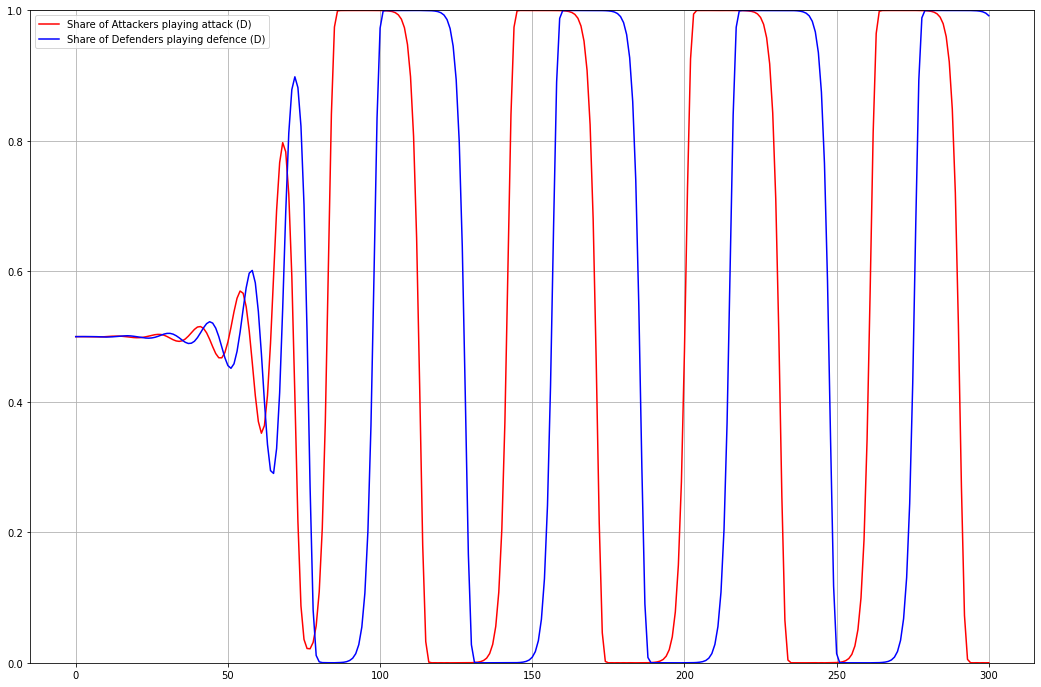

In [ ]:
# Simulation

# Set initial population shares
p1 = [0.5]         # probability of playing C for attackers
p2 = [1 - p1[0]]   # probability of playing D for attackers

q1 = [0.5]         # probability of playing C for defenders
q2 = [1 - q1[0]]   # probability of playing D for defenders

for t in range(300):

    if p2[t] >= 1:
      p2[t] = 1
      randAtt = random.uniform(-0.0001, 0.000)
    elif p2[t] <= 0:
      p2[t] = 0
      randAtt = random.uniform(0.0001, 0.0001)
    else:
      randAtt = random.uniform(-0.0001, 0.0001)

    if q2[t] >= 1:
      q2[t] = 1
      randDef = random.uniform(-0.0001, 0.000)
    elif q2[t] <= 0:
      q2[t] = 0
      randDef = random.uniform(0.000, 0.0001)
    else:
      randDef = random.uniform(-0.0001, 0.0001)

    # Activate/Deactivate the random effect
    # randAtt = 0
    # randDef = 0

    # Formula for replicator system
    # Population state at t plus growth rate plus random effect.
    attackerpop = p2[t] + ((p2[t] - 1) * (2 * q2[t] - 1) * p2[t]) + randAtt
    defenderpop = q2[t] + ((2 * p2[t] - 1) * (q2[t] - 1) * -q2[t]) + randDef

    p2.append(attackerpop)
    q2.append(defenderpop)

# Print population states
# print(p1, p2)
# print(q1, q2)

# Plot population states
plt.rcParams["figure.figsize"] = (18,12)
plt.plot(p2, 'r', label ='Share of Attackers playing attack (D)')
plt.plot(q2, 'b', label ='Share of Defenders playing defence (D)')

plt.grid()
plt.ylim(0, 1)
plt.legend(loc='best')